In [1]:
import pandas as pd
from pathlib import Path
import re
import pandas as pd
import tqdm
from top2vec import Top2Vec

import pandas as pd
from pathlib import Path
import pandas as pd
from top2vec import Top2Vec
import logging
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer

PATH_TO_MODELS=Path('models')
PATH_TO_OUTDATA=Path('data')

In [20]:
df=pd.read_pickle(PATH_TO_OUTDATA / 'data.pkl')
df=df.reset_index()
df.head()
df.to_parquet(PATH_TO_OUTDATA / 'data4.pqt')

In [2]:
sentence_model = SentenceTransformer('KBLab/sentence-bert-swedish-cased').encode
from functools import partial

In [4]:
sentence_model.max_length

AttributeError: 'function' object has no attribute 'max_length'

In [18]:
tokenizer = AutoTokenizer.from_pretrained('KBLab/sentence-bert-swedish-cased',max_length=350).tokenize

In [27]:
#to=AutoTokenizer.from_pretrained('KBLab/sentence-bert-swedish-cased',max_length=512)
type(to)

transformers.models.bert.tokenization_bert_fast.BertTokenizerFast

In [4]:
"""

model = Top2Vec(df.text.to_list(), document_chunker='sequential', embedding_model='universal-sentence-encoder')
model.save(r"models\Modell_11_21_universal.mod")"""

2022-11-21 21:59:20,647 - top2vec - INFO - Pre-processing documents for training
c:\Datalab\ML_projekt\venv38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-21 22:06:44,328 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-11-21 22:07:11,006 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-21 22:21:06,363 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-21 22:22:17,043 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-21 22:22:17,264 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


### Sanity checks

In [6]:
for w, s in zip(*model.similar_words(['arbetsloshet','sysselsattning'],10)):
    print(w,s)

stodja 0.7297539895049763
utrymning 0.7169428603364159
utomordentliga 0.7136676221037636
uppnas 0.7106133147364305
investerarens 0.710007318902433
lutbestammelser 0.7085996145321167
landsradet 0.7075785167891252
resekostnader 0.7036258796326369
aterfanns 0.70240868140564
diagnoser 0.7022356713294726


In [7]:
model.document_vectors.shape

(1687, 512)

In [8]:
for scores, ids in zip(*model.search_documents_by_vector(model.document_vectors[0],num_docs=5,return_documents=False)):
    print(scores, ids)

0.9999999 0
0.94979095 1124
0.94435096 712
0.9423878 638
0.9405361 1428


In [9]:
model.get_num_topics()

2

Text(0.5, 1.0, 'Topic sizes')

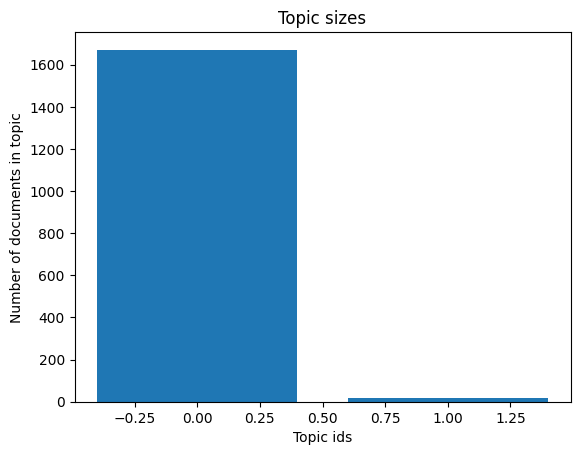

In [11]:
import matplotlib.pyplot as plt
topic_sizes, topic_nums = model.get_topic_sizes()
plt.bar(topic_nums, topic_sizes)
plt.xlabel('Topic ids')
plt.ylabel('Number of documents in topic')
plt.title('Topic sizes')

In [3]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer('KBLab/sentence-bert-swedish-cased')


In [12]:
ll=df['text'][20:100].to_list()
len(ll)

80

In [17]:
model = Top2Vec(ll, split_documents=True,  embedding_model='distiluse-base-multilingual-cased', verbose=True)

2022-11-22 21:26:04,640 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
c:\Datalab\ML_projekt\venv38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-11-22 21:26:34,174 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2022-11-22 21:26:40,055 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


OutOfMemoryError: CUDA out of memory. Tried to allocate 352.00 MiB (GPU 0; 2.00 GiB total capacity; 424.12 MiB already allocated; 0 bytes free; 434.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [31]:
# By default Top2Vec uses from gensim.utils.simple_preprocess to tokenize.
# But in Top2Vec deacc is set to True
# We use functools to change the default setting
from gensim.utils import simple_preprocess
from functools import partial
tok=partial(simple_preprocess,deacc=False) # Change default value and instantiate new function tok

In [32]:

model = Top2Vec(df['text'][:100].values, split_documents=True,tokenizer=tok)

2022-11-22 10:18:25,761 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-22 10:18:48,956 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-22 10:32:05,384 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-22 10:32:14,846 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-22 10:32:14,883 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
